In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Preface of the data
All Indian Premier League Cricket matches between 2008 and 2016.

This is the ball by ball data of all the IPL cricket matches till season 9.

The dataset contains 2 files: deliveries.csv and matches.csv.

matches.csv contains details related to the match such as location, contesting teams, umpires, results, etc.

deliveries.csv is the ball-by-ball data of all the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc.

## Objective: 
Predicting the result of your favourite team based on past data, Visualizations, Perspectives, etc.

In [4]:
df1 = pd.read_csv('matches.csv')
df2 = pd.read_csv('deliveries.csv')

In [5]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
print(df1.shape)
print(df2.shape)

(636, 18)
(150460, 21)


In [8]:
# starting to work with df1 - matches.csv

# dropping off the id col
df1.drop('id',axis=1,inplace=True)

In [9]:
df1.isna().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

## Data Cleaning

In [10]:
# fixing null vals before moving forward

# for city

df1.loc[df1.city.isnull()]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


All missing cities are from season 2014, ranging from 2014-4-19 to 2014-4-30.
Interestingly, all these matches were held in Dubai international stadium, therefore the missing city is Dubai

In [11]:
df1['city'][df1.city.isna()] = 'Dubai'

In [12]:
# check if there are any missing cities now
df1.city.isna().sum()

0

In [13]:
# for winner and player of the match

# if we notice - both of them are in same rows as there was no match result
df1.loc[df1.winner.isna()]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [14]:
# we can drop these rows as they dont help us with our objective function
df1 = df1[df1.winner.notna()]

In [15]:
# verify
df1.winner.isna().sum()

0

In [16]:
# missing umpire values

Its not possible that there was no umpire in the match,so we will fill out the missing umpire based on the most frequent umpire in season 2017 - but the confluence of a team winning based on an umpire is almost None, so we drop the umpire column

In [17]:
df1.drop(['umpire1','umpire2','umpire3'],axis=1,inplace=True)

In [18]:
# final check of missing values
df1.isna().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [19]:
# there are still some features which doesnt contribute for a team to win a match like win by runs etc
df1.drop('win_by_wickets',axis=1, inplace=True)

Good to go to perform the analysis

## Analysis

My favorite team here is Mumbai Indians - we can pick our favorite team and do similar analysis on them 
( for simplicity I am only analysing one team)

In [20]:
df1.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,player_of_match,venue
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,GJ Maxwell,Holkar Cricket Stadium
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,KM Jadhav,M Chinnaswamy Stadium


In [21]:
# sorting pandas column by date
df1 = df1.sort_values(by=['date'])

In [22]:
df1.team1.unique()

array(['Kolkata Knight Riders', 'Rajasthan Royals', 'Chennai Super Kings',
       'Deccan Chargers', 'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [23]:
df1.loc[ df1['team1'] == 'Rising Pune Supergiant' , 'team1'] = 'Rising Pune Supergiants'

In [24]:
df1.team1.unique()

array(['Kolkata Knight Riders', 'Rajasthan Royals', 'Chennai Super Kings',
       'Deccan Chargers', 'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

In [25]:
# mapping every team name with their abbreviations
df1.replace(['Kolkata Knight Riders', 'Rajasthan Royals', 'Chennai Super Kings',
       'Deccan Chargers', 'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions','Rising Pune Supergiant',],value=['KKR' , 'RR', 'CSK','DC','MI','KX1P','RCB','DD','KTK','PW','SRH','RPS','GL','RPS'],inplace=True)

In [26]:
# total matches played 
print("Total matches played: ",df1.shape[0])
print("\nTotal venues: ",df1.city.unique())
print("\n Total teams: ",df1.team1.unique())

Total matches played:  633

Total venues:  ['Bangalore' 'Delhi' 'Chandigarh' 'Kolkata' 'Mumbai' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'Sharjah' 'Dubai' 'Rajkot' 'Kanpur']

 Total teams:  ['KKR' 'RR' 'CSK' 'DC' 'MI' 'KX1P' 'RCB' 'DD' 'KTK' 'PW' 'SRH' 'RPS' 'GL']


In [27]:
print("Most man of the match awards:" , (df1['player_of_match'].value_counts()).idxmax())
print("Number of the match awards:" , (df1['player_of_match'].value_counts()).max())

Most man of the match awards: CH Gayle
Number of the match awards: 18


In [28]:
# our result col has some ambigous values, normal means loss or win ?
df1.result.value_counts()

normal    626
tie         7
Name: result, dtype: int64

In [29]:
# now extracting the section of our data where our favourite team - Mumbai Indians in present
MI_df = df1.loc[ (df1['team1']=='MI') | (df1['team2']=='MI')]

In [30]:
MI_df.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,player_of_match,venue
62,2008,Mumbai,2008-04-20,MI,RCB,MI,bat,normal,0,RCB,0,MV Boucher,Wankhede Stadium
66,2008,Chennai,2008-04-23,CSK,MI,MI,field,normal,0,CSK,6,ML Hayden,"MA Chidambaram Stadium, Chepauk"
68,2008,Chandigarh,2008-04-25,KX1P,MI,MI,field,normal,0,KX1P,66,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali"
71,2008,Mumbai,2008-04-27,MI,DC,DC,field,normal,0,DC,0,AC Gilchrist,Dr DY Patil Sports Academy
74,2008,Kolkata,2008-04-29,KKR,MI,KKR,bat,normal,0,MI,0,ST Jayasuriya,Eden Gardens


In [31]:
MI_df[['win_by_runs','season','team2']][MI_df['winner']=='MI'].max()

win_by_runs     146
season         2017
team2           SRH
dtype: object

The highest win of Mumbai Indians when they batted first, was by 146 runs in 2017 again Sunrisers Hyderabad

In [32]:
# wins by MI per seasons
MI_df[['season','winner']][MI_df['winner']=='MI'].value_counts(sort=False)

season  winner
2008    MI         7
2009    MI         5
2010    MI        11
2011    MI        10
2012    MI        10
2013    MI        13
2014    MI         7
2015    MI        10
2016    MI         7
2017    MI        12
dtype: int64

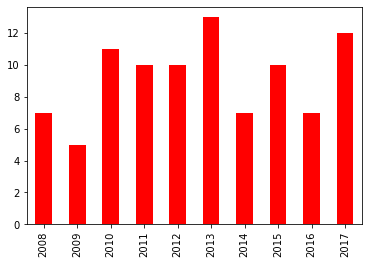

In [33]:
MI_df['season'][MI_df['winner']=='MI'].value_counts(sort=False).plot(kind='bar',color='r')
plt.show()

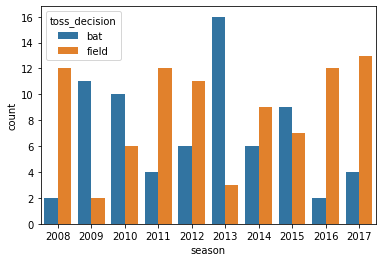

In [34]:
# decisions when MI won the toss
sns.countplot(data=MI_df, x='season',hue='toss_decision')
plt.show()

In [35]:
# win to loss ration when MI won the toss and elected to bat first
wins = MI_df.loc[(MI_df['toss_winner']=='MI') & (MI_df['toss_decision']=='bat') & (MI_df['winner']=='MI')].shape[0]
lose = MI_df.loc[ ((MI_df['team1']=='MI') | (MI_df['team2']=='MI')) & (MI_df['toss_decision']=='bat') & (MI_df['winner']!='MI')].shape[0]
print("This is how many times MI won the match when it batted first:", wins)

This is how many times MI won the match when it batted first: 22


In [36]:
# Win percentage when bat first
per_bat = (wins / (wins+lose))*100
print("Win percentage when bat first: ","%.2f"%per_bat , '%')

Win percentage when bat first:  43.14 %


In [37]:
# win to loss ration when MI won the toss and elected to bowl first
wins = MI_df.loc[ (MI_df['toss_winner']=='MI') & (MI_df['toss_decision']=='field') & (MI_df['winner']=='MI')].shape[0]
lose = MI_df.loc[(MI_df['toss_winner']=='MI') & ((MI_df['team1']=='MI') | (MI_df['team2']=='MI')) & (MI_df['toss_decision']=='field') & (MI_df['winner']!='MI')].shape[0]
print("This is how many times MI won the match when it bowled first:", wins)

This is how many times MI won the match when it bowled first: 26


In [38]:
# Win percentage when bowl first
per_bowl = (wins / (wins+lose))*100
print("Win percentage when bowl first: ","%.2f"%per_bowl , '%')

Win percentage when bowl first:  57.78 %


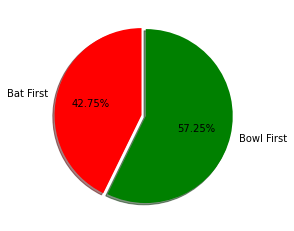

In [39]:
slices = [per_bat,per_bowl]
labels = ['Bat First' , 'Bowl First']
plt.pie(slices, labels=labels,shadow=True,explode=[0,0.05],colors=['r','g'],startangle=90,autopct='%0.2f%%')
plt.show()

We can conclude that MI has won approximately 60% of the matches when it bowled first

#### Mumbai Indians performance based on city they played in

In [40]:
unique_cities = MI_df.city.unique()
unique_cities

array(['Mumbai', 'Chennai', 'Chandigarh', 'Kolkata', 'Hyderabad', 'Delhi',
       'Jaipur', 'Bangalore', 'Cape Town', 'Durban', 'Port Elizabeth',
       'East London', 'Johannesburg', 'Centurion', 'Visakhapatnam',
       'Pune', 'Dharamsala', 'Abu Dhabi', 'Dubai', 'Sharjah', 'Cuttack',
       'Ahmedabad', 'Kanpur', 'Indore', 'Rajkot'], dtype=object)

In [41]:
cities = MI_df.groupby('city')
for city in unique_cities:
    print(city)
    print(cities.get_group(city))

Mumbai
    season    city        date team1 team2 toss_winner toss_decision  result  \
62    2008  Mumbai  2008-04-20    MI   RCB          MI           bat  normal   
71    2008  Mumbai  2008-04-27    MI    DC          DC         field  normal   
81    2008  Mumbai  2008-05-04    MI    DD          DD         field  normal   
85    2008  Mumbai  2008-05-07    RR    MI          MI         field  normal   
95    2008  Mumbai  2008-05-14   CSK    MI          MI         field  normal   
..     ...     ...         ...   ...   ...         ...           ...     ...   
23    2017  Mumbai  2017-04-22    MI    DD          DD         field  normal   
27    2017  Mumbai  2017-04-24   RPS    MI          MI         field  normal   
36    2017  Mumbai  2017-05-01   RCB    MI         RCB           bat  normal   
49    2017  Mumbai  2017-05-11  KX1P    MI          MI         field  normal   
55    2017  Mumbai  2017-05-16   RPS    MI          MI         field  normal   

    dl_applied winner  win_by_ru

In [42]:
MI_df.loc[ (MI_df.winner=='MI') & (MI_df.city=='Ahmedabad') ]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,player_of_match,venue
500,2014,Ahmedabad,2014-05-19,MI,RR,MI,bat,normal,0,MI,25,MEK Hussey,"Sardar Patel Stadium, Motera"


In [43]:
for city in unique_cities:
    wins = MI_df.loc[ (MI_df.winner=='MI') & (MI_df.city==city) ].shape[0]
    print("Number of wins in {0} are: {1}".format(city,wins))

Number of wins in Mumbai are: 45
Number of wins in Chennai are: 3
Number of wins in Chandigarh are: 4
Number of wins in Kolkata are: 9
Number of wins in Hyderabad are: 5
Number of wins in Delhi are: 3
Number of wins in Jaipur are: 2
Number of wins in Bangalore are: 8
Number of wins in Cape Town are: 1
Number of wins in Durban are: 0
Number of wins in Port Elizabeth are: 2
Number of wins in East London are: 1
Number of wins in Johannesburg are: 0
Number of wins in Centurion are: 1
Number of wins in Visakhapatnam are: 2
Number of wins in Pune are: 3
Number of wins in Dharamsala are: 0
Number of wins in Abu Dhabi are: 0
Number of wins in Dubai are: 0
Number of wins in Sharjah are: 0
Number of wins in Cuttack are: 0
Number of wins in Ahmedabad are: 1
Number of wins in Kanpur are: 0
Number of wins in Indore are: 1
Number of wins in Rajkot are: 1


In [44]:
# Writing more optimized code using a dictionary
wins_by_cities = {}
for city in unique_cities:
    if city not in wins_by_cities.keys():
        wins_by_cities[city] = MI_df.loc[ (MI_df.winner=='MI') & (MI_df.city==city) ].shape[0]
        
# sorting dictionary values based on win count
sorted_wins_cities = sorted(wins_by_cities.items(), key=lambda x: x[1], reverse=True)
sorted_wins_cities

[('Mumbai', 45),
 ('Kolkata', 9),
 ('Bangalore', 8),
 ('Hyderabad', 5),
 ('Chandigarh', 4),
 ('Chennai', 3),
 ('Delhi', 3),
 ('Pune', 3),
 ('Jaipur', 2),
 ('Port Elizabeth', 2),
 ('Visakhapatnam', 2),
 ('Cape Town', 1),
 ('East London', 1),
 ('Centurion', 1),
 ('Ahmedabad', 1),
 ('Indore', 1),
 ('Rajkot', 1),
 ('Durban', 0),
 ('Johannesburg', 0),
 ('Dharamsala', 0),
 ('Abu Dhabi', 0),
 ('Dubai', 0),
 ('Sharjah', 0),
 ('Cuttack', 0),
 ('Kanpur', 0)]

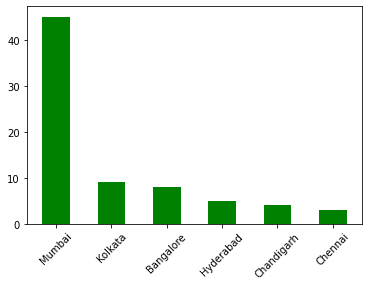

In [45]:
x_val = [x[0] for x in sorted_wins_cities][:6]
y_val = [x[1] for x in sorted_wins_cities][:6]

plt.bar(x_val,y_val,width=0.5,color='g')
plt.xticks(x_val, rotation=45)
plt.show()

We can conclude that most of MI wins were in their home ground followed by other local cities. They had almost no wins on international pitches.

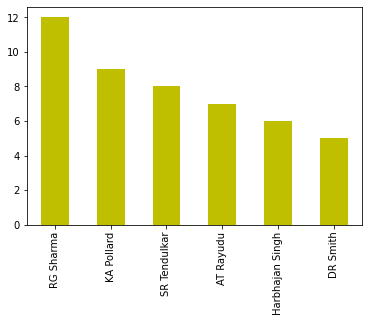

In [46]:
# Also lets see who got most man of the matches awards from MI
MI_df.player_of_match.value_counts()[:6].plot(kind='bar',color='y')
plt.show()

These players got most MoM awards therefore they cant be leftout from the squad

### Head to head matches of MI with most match winning teams

In [47]:
strong_teams = MI_df.winner.value_counts().index.to_list()[1:9]
strong_teams

['CSK', 'KX1P', 'DD', 'RCB', 'RR', 'SRH', 'KKR', 'RPS']

In [48]:
for team in strong_teams:
    df = MI_df.loc[ (MI_df.team1==team) | ((MI_df.team2==team))]
    wins= df.loc[ df.winner=='MI' ].shape[0]
    print("MI has won {0} matches against {1}, and their win percentage is: {2:.2f}%\n"\
          .format(wins, team, (wins/df.shape[0])*100))

MI has won 12 matches against CSK, and their win percentage is: 54.55%

MI has won 10 matches against KX1P, and their win percentage is: 50.00%

MI has won 11 matches against DD, and their win percentage is: 55.00%

MI has won 13 matches against RCB, and their win percentage is: 61.90%

MI has won 10 matches against RR, and their win percentage is: 62.50%

MI has won 5 matches against SRH, and their win percentage is: 50.00%

MI has won 16 matches against KKR, and their win percentage is: 76.19%

MI has won 2 matches against RPS, and their win percentage is: 33.33%



#### According to the results, RPS,KXIP, CSK, DD and SRH can be the most competitive teams for the upcoming IPL. And for MI to win IPL, it should focus more against these teams.

In [49]:
# working with df2

In [56]:
# mapping every team name with their abbreviations
df2.replace(['Kolkata Knight Riders', 'Rajasthan Royals', 'Chennai Super Kings',
       'Deccan Chargers', 'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions','Rising Pune Supergiant'],value=['KKR' , 'RR', 'CSK','DC','MI','KX1P','RCB','DD','KTK','PW','SRH','RPS','GL','RPS'],inplace=True)

In [57]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [58]:
# extracting games of Mumbai Indians
MI_df2 = df2.loc[ (df2.batting_team=='MI') | (df2.bowling_team=='MI') ]
MI_df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
248,2,1,MI,RPS,1,1,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
249,2,1,MI,RPS,1,2,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
250,2,1,MI,RPS,1,3,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
251,2,1,MI,RPS,1,4,JC Buttler,PA Patel,AB Dinda,0,...,0,0,0,0,5,0,5,NaN,NaN,NaN
252,2,1,MI,RPS,1,5,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [59]:
MI_df2.shape

(37822, 21)

Analysing the teams performance against the most strongest teams, as found above.

In [60]:
strong_teams

['CSK', 'KX1P', 'DD', 'RCB', 'RR', 'SRH', 'KKR', 'RPS']

In [150]:
# also it was analyised that RPS,KXIP, CSK, DD and SRH can be the most competitive teams
# lets analyse our team performance against one of these teams - similar analysis can be done for other teams

#### Against RPS

In [62]:
mi_rps = MI_df2.loc[ (df2.batting_team=='RPS') | (df2.bowling_team=='RPS')  ]
mi_rps.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
248,2,1,MI,RPS,1,1,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
249,2,1,MI,RPS,1,2,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
250,2,1,MI,RPS,1,3,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
251,2,1,MI,RPS,1,4,JC Buttler,PA Patel,AB Dinda,0,...,0,0,0,0,5,0,5,NaN,NaN,NaN
252,2,1,MI,RPS,1,5,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [64]:
# Number of boundaries against RPS
mi_rps['total_runs'][ ((df2.batting_team=='MI') & (df2.bowling_team=='RPS')) ].value_counts()

1    311
0    282
4     70
2     37
6     36
5      2
3      1
Name: total_runs, dtype: int64

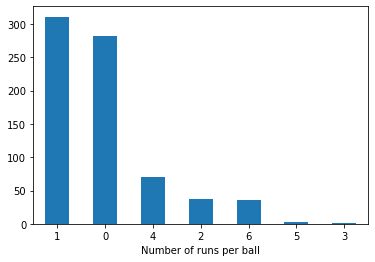

In [71]:
mi_rps['total_runs'][ ((df2.batting_team=='MI') & (df2.bowling_team=='RPS')) ].value_counts().plot(kind='bar')
plt.xlabel("Number of runs per ball")
plt.xticks(rotation=0)
plt.show()

In [88]:
# total balls played
print("Total balls played: ",mi_rps.ball.value_counts().cumsum()[9])

Total balls played:  1450


In [92]:
print("Percentage of balls on which ONE run was scored: {}% ".format((311/1450)*100))
print("Percentage of balls on which NO run was scored: {}%".format((282/1450)*100))

Percentage of balls on which ONE run was scored: 21.448275862068968% 
Percentage of balls on which NO run was scored: 19.448275862068964%


41% of balls played were wither dot or single, which caused the team to lose many matches

In [99]:
# batsman who scored most runs
batsmen = mi_rps['batsman'].unique()
batsmen

array(['PA Patel', 'JC Buttler', 'RG Sharma', 'N Rana', 'AT Rayudu',
       'KH Pandya', 'KA Pollard', 'HH Pandya', 'TG Southee', 'AM Rahane',
       'MA Agarwal', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'RA Tripathi',
       'MK Tiwary', 'DT Christian', 'Washington Sundar', 'KV Sharma',
       'Harbhajan Singh', 'LMP Simmons', 'MJ McClenaghan', 'JJ Bumrah',
       'SL Malinga', 'MG Johnson', 'S Gopal', 'R Vinay Kumar',
       'F du Plessis', 'KP Pietersen', 'SS Tiwary', 'PSP Handscomb',
       'NLTC Perera', 'R Bhatia'], dtype=object)

In [107]:
matches = mi_rps.match_id.value_counts().index.to_list()
matches

[56, 59, 2, 28, 605, 577]

In [164]:
# finding the cumulative scores of each of the batsman for each match
score_player = {}
for match_num in matches:
    for batman in batsmen:
        if batman not in score_player.keys():
            score_player[batman] = mi_rps.batsman_runs[ (mi_rps.batsman==batman) & (mi_rps.match_id==match_num)].sum()
        else:
            score_player[batman]+= mi_rps.batsman_runs[ (mi_rps.batsman==batman) & (mi_rps.match_id==match_num)].sum()
            
# sorting the dict based on runs scored
score_player_sorted = sorted(score_player.items(), key=lambda x: x[1], reverse=True)

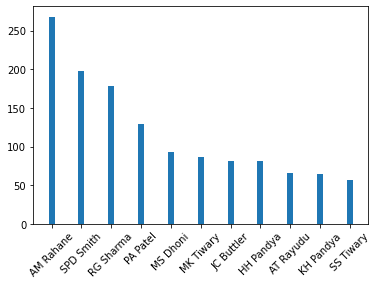

In [166]:
# getting top 10 run scorers against RPS
score_player_sorted=score_player_sorted[:11]

x_val = [x[0] for x in score_player_sorted]
y_val = [x[1] for x in score_player_sorted]

plt.bar(x_val,y_val,width=0.2)
plt.xticks(rotation=45)
plt.show()

These players can be the key run scorers for the team

In [172]:
# Average runs of these players by match
for batman in x_val:
    runs = (score_player[batman]) / len(matches)
    print("Average runs scored by {0} per match are: {1:0.2f}".format(batman,runs))

Average runs scored by AM Rahane per match are: 44.67
Average runs scored by SPD Smith per match are: 33.00
Average runs scored by RG Sharma per match are: 29.67
Average runs scored by PA Patel per match are: 21.50
Average runs scored by MS Dhoni per match are: 15.50
Average runs scored by MK Tiwary per match are: 14.50
Average runs scored by JC Buttler per match are: 13.67
Average runs scored by HH Pandya per match are: 13.50
Average runs scored by AT Rayudu per match are: 11.00
Average runs scored by KH Pandya per match are: 10.83
Average runs scored by SS Tiwary per match are: 9.50


In [152]:
# most key bowlers against RPS
mi_bowl = MI_df2.loc[ (df2.batting_team=='RPS') | (df2.bowling_team=='MI') ]
mi_bowl.shape

(18879, 21)

In [153]:
mi_bowl.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
373,2,2,RPS,MI,1,1,AM Rahane,MA Agarwal,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
374,2,2,RPS,MI,1,2,MA Agarwal,AM Rahane,TG Southee,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
375,2,2,RPS,MI,1,3,MA Agarwal,AM Rahane,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
376,2,2,RPS,MI,1,4,MA Agarwal,AM Rahane,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
377,2,2,RPS,MI,1,5,AM Rahane,MA Agarwal,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [154]:
# calculating runs conceded by every bowler
bowlers = mi_bowl['bowler'].unique()
bowlers

array(['TG Southee', 'HH Pandya', 'MJ McClenaghan', 'JJ Bumrah',
       'KH Pandya', 'KA Pollard', 'SL Malinga', 'Harbhajan Singh',
       'MG Johnson', 'KV Sharma', 'R Vinay Kumar', 'A Nehra',
       'SM Pollock', 'DS Kulkarni', 'ST Jayasuriya', 'AM Nayar',
       'DJ Bravo', 'VS Yeligati', 'MA Khote', 'SD Chitnis',
       'CRD Fernando', 'DJ Thornely', 'RR Raje', 'DR Smith', 'A Nel',
       'Z Khan', 'SR Tendulkar', 'JP Duminy', 'GR Napier', 'C Nanda',
       'AM Rahane', 'RA Shaikh', 'R McLaren', 'AG Murtaza', 'R Sathish',
       'AN Ahmed', 'STR Binny', 'MM Patel', 'JEC Franklin', 'RG Sharma',
       'TL Suman', 'A Symonds', 'RW Price', 'PP Ojha', 'RP Singh',
       'CJ McKay', 'NLTC Perera', 'RJ Peterson', 'R Shukla', 'JDP Oram',
       'R Dhawan', 'YS Chahal', 'P Suyal', 'GJ Maxwell',
       'NM Coulter-Nile', 'CJ Anderson', 'P Kumar', 'LMP Simmons',
       'K Santokie', 'S Gopal', 'M de Lange', 'J Suchith', 'N Rana'],
      dtype=object)

In [173]:
runs_conceded = {}
for match_num in matches:
    for bowler in bowlers:
        if bowler not in runs_conceded.keys():
            runs_conceded[bowler] = mi_bowl['batsman_runs'][mi_bowl['bowler']==bowler].sum()
        else:
            runs_conceded[bowler] += mi_bowl['batsman_runs'][mi_bowl['bowler']==bowler].sum()
        
runs_conceded_sorted = sorted(runs_conceded.items(), key=lambda x: x[1], reverse=True)

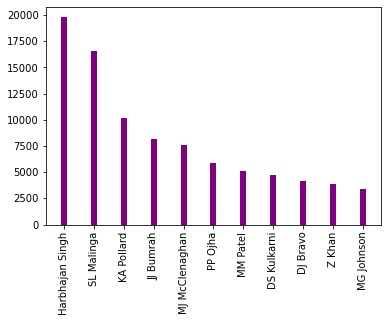

In [181]:
runs_conceded_sorted = runs_conceded_sorted[:11]
x = [x[0] for x in runs_conceded_sorted]
y = [x[1] for x in runs_conceded_sorted]

plt.bar(x,y,width=0.2,color='purple')
plt.xticks(rotation=90)
plt.show()

These are the most expensive bowlers of our team

#### Bowlers with most wickets

In [193]:
mi_bowl.loc[(mi_bowl['player_dismissed'].notna()) & (mi_bowl['bowler']=='KH Pandya') ].shape[0]

17

In [196]:
most_wickets = {}
for bowler in bowlers:
    if bowler not in most_wickets.keys():
        most_wickets[bowler] = mi_bowl.loc[(mi_bowl['player_dismissed'].notna()) & (mi_bowl['bowler']==bowler) ].shape[0]

        
most_wickets_sorted = sorted(most_wickets.items(), key=lambda x: x[1], reverse=True)
most_wickets_sorted = most_wickets_sorted[:11]
most_wickets_sorted

[('SL Malinga', 170),
 ('Harbhajan Singh', 136),
 ('KA Pollard', 67),
 ('MJ McClenaghan', 56),
 ('JJ Bumrah', 53),
 ('MM Patel', 42),
 ('DS Kulkarni', 39),
 ('MG Johnson', 33),
 ('PP Ojha', 33),
 ('Z Khan', 31),
 ('DJ Bravo', 30)]

These bowlers are the key bowlers for our team with most wickets

In [201]:
# checking out our most expensive and most wicket taking bowlers
exp = set(x)
wic = set([x[0] for x in most_wickets_sorted])
exp.intersection(wic)

{'DJ Bravo',
 'DS Kulkarni',
 'Harbhajan Singh',
 'JJ Bumrah',
 'KA Pollard',
 'MG Johnson',
 'MJ McClenaghan',
 'MM Patel',
 'PP Ojha',
 'SL Malinga',
 'Z Khan'}

#### The coach needs to work on these bowlers to get the most out of them

# Conclusion: Based on the analysis, there is a good chance for Mumbai Indians to win the next IPL if they perform well against the most competitive teams mentioned.